In [1]:
#Import python libraries
#NumPy (Numerical Python) is a popular Python library for numerical and scientific computing. It provides support for large, multi-dimensional arrays and matrices, as well as a variety of high-level mathematical functions to operate on these arrays.
import numpy as np
#Pandas is an open-source Python library that provides easy-to-use data structures and data analysis tools for working with structured data. It is widely used in data science, data analysis, and data manipulation tasks.
import pandas as pd
import matplotlib.pyplot as plt
#Simple and efficient tools for data mining and data analysis. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means, etc.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

#importing machine learning algorithm for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#model evaluation
from sklearn.metrics import roc_curve, auc

In [2]:
#data import(upload)
df = pd.read_csv('HepatitisCdata.csv')

In [3]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
df.shape

(615, 14)

In [6]:
#checking for null values 
df.isnull().sum() 

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [7]:
# replacing the null with the mean
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)

# dropping the Unnamed coloumn
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [8]:
# performing mapping 
# converting the Category and Sex to numeric value 
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

In [9]:
# checking 
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [10]:
# Creating a Correlation Heatmap
df.corr().style.background_gradient(cmap = 'hot')

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.037781,-0.071663,-0.179859,-0.061356,0.088726,0.621724,0.398451,-0.230785,-0.265474,0.136772,0.437680,0.083956
Age,0.037781,1.000000,0.024544,-0.197005,0.168473,-0.006017,0.088666,0.032492,-0.075093,0.123978,-0.022296,0.153087,-0.153665
Sex,-0.071663,0.024544,1.000000,-0.146065,0.019547,-0.161785,-0.130891,-0.111177,-0.169111,0.029886,-0.159589,-0.133276,-0.051250
ALB,-0.179859,-0.197005,-0.146065,1.000000,-0.138858,0.001606,-0.193397,-0.221650,0.375848,0.204803,-0.001573,-0.155555,0.550033
ALP,-0.061356,0.168473,0.019547,-0.138858,1.000000,0.172461,0.062202,0.048600,0.032971,0.121914,0.149554,0.442262,-0.053633
ALT,0.088726,-0.006017,-0.161785,0.001606,0.172461,1.000000,0.273325,-0.038468,0.146953,0.068023,-0.043025,0.248086,0.094373
AST,0.621724,0.088666,-0.130891,-0.193397,0.062202,0.273325,1.000000,0.312231,-0.208536,-0.207507,-0.021387,0.491263,0.039888
BIL,0.398451,0.032492,-0.111177,-0.221650,0.048600,-0.038468,0.312231,1.000000,-0.333172,-0.156261,0.031224,0.217024,-0.041309
CHE,-0.230785,-0.075093,-0.169111,0.375848,0.032971,0.146953,-0.208536,-0.333172,1.000000,0.420163,-0.011157,-0.110345,0.293184
CHOL,-0.265474,0.123978,0.029886,0.204803,0.121914,0.068023,-0.207507,-0.156261,0.420163,1.000000,-0.047667,-0.006828,0.206546


In [11]:
df.corr().round(2)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.00,0.04,-0.07,-0.18,-0.06,0.09,0.62,0.40,-0.23,-0.27,0.14,0.44,0.08
Age,0.04,1.00,0.02,-0.20,0.17,-0.01,0.09,0.03,-0.08,0.12,-0.02,0.15,-0.15
Sex,-0.07,0.02,1.00,-0.15,0.02,-0.16,-0.13,-0.11,-0.17,0.03,-0.16,-0.13,-0.05
ALB,-0.18,-0.20,-0.15,1.00,-0.14,0.00,-0.19,-0.22,0.38,0.20,-0.00,-0.16,0.55
ALP,-0.06,0.17,0.02,-0.14,1.00,0.17,0.06,0.05,0.03,0.12,0.15,0.44,-0.05
ALT,0.09,-0.01,-0.16,0.00,0.17,1.00,0.27,-0.04,0.15,0.07,-0.04,0.25,0.09
AST,0.62,0.09,-0.13,-0.19,0.06,0.27,1.00,0.31,-0.21,-0.21,-0.02,0.49,0.04
BIL,0.40,0.03,-0.11,-0.22,0.05,-0.04,0.31,1.00,-0.33,-0.16,0.03,0.22,-0.04
CHE,-0.23,-0.08,-0.17,0.38,0.03,0.15,-0.21,-0.33,1.00,0.42,-0.01,-0.11,0.29
CHOL,-0.27,0.12,0.03,0.20,0.12,0.07,-0.21,-0.16,0.42,1.00,-0.05,-0.01,0.21


In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Define a threshold for correlation
correlation_threshold = 0.8
# Create a correlation mask
correlation_mask = (np.abs(correlation_matrix) > correlation_threshold)

In [13]:
# Find the highly correlated feature pairs
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_mask.iloc[i, j]:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add(feature_i)
            highly_correlated_features.add(feature_j)

# Create a new DataFrame with highly correlated features removed
filtered_df = df.drop(columns=highly_correlated_features)

In [14]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


Total Healthy Patients : 540 
Total Unhealthy Patients : 75 


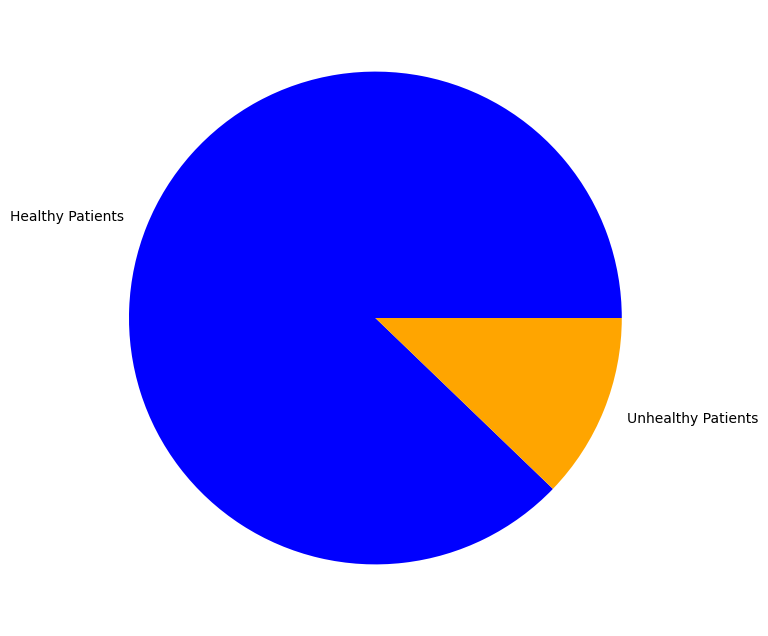

In [15]:
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Unhealthy Patients : {} '.format(df.Category.value_counts()[1]))
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(),
        colors=["blue","Orange"],
        labels=["Healthy Patients","Unhealthy Patients"],
        )

plt.show()

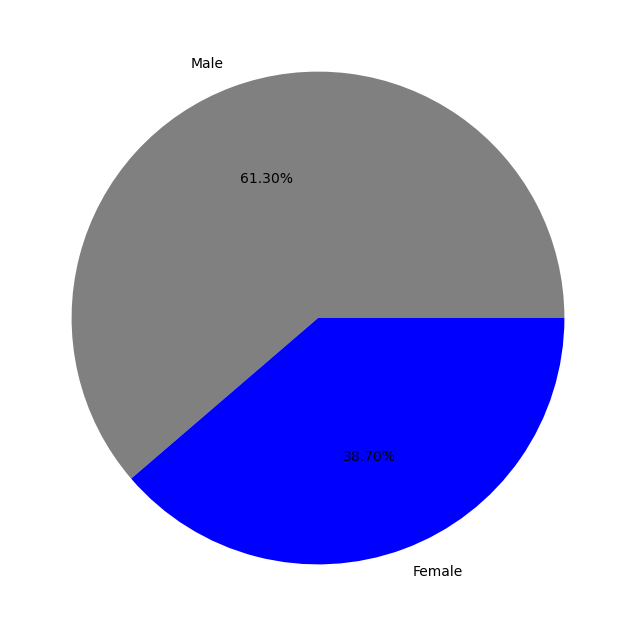

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(),
        colors=["grey","blue"],
        labels=["Male","Female"],
        autopct="%1.2f%%",
        )
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


In [18]:
# Splitting the dataset into train and test 

X = df.drop("Category", axis=1) #X_train
y = df["Category"] #y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Category, Length: 615, dtype: int64

In [20]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [21]:
rf = RandomForestClassifier(max_features = 0.2)
rf.fit(X,y)
predict = cross_val_predict(estimator = rf, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       540
           1       0.90      0.73      0.81        75

    accuracy                           0.96       615
   macro avg       0.93      0.86      0.89       615
weighted avg       0.96      0.96      0.96       615



In [27]:
# getting the Classification Report using KNN classifier
knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       540
           1       0.87      0.64      0.74        75

    accuracy                           0.94       615
   macro avg       0.91      0.81      0.85       615
weighted avg       0.94      0.94      0.94       615



C:\Apna program\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Apna program\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [22]:
def plot_roc(X_test, y_test, models):
    for name, model in models.items():
        if hasattr(model, 'decision_function'):
            probs = model.decision_function(X_test)
        elif hasattr(model, 'predict_proba'):
            probs = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresold = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        print('ROC AUC=%0.2f'%roc_auc)
        plt.plot(fpr, tpr, label='')
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0,1], 'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    

C:\Apna program\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Apna program\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Apna program\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Apna program\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC AUC=0.50
ROC AUC=0.69
ROC AUC=0.71
ROC AUC=0.50


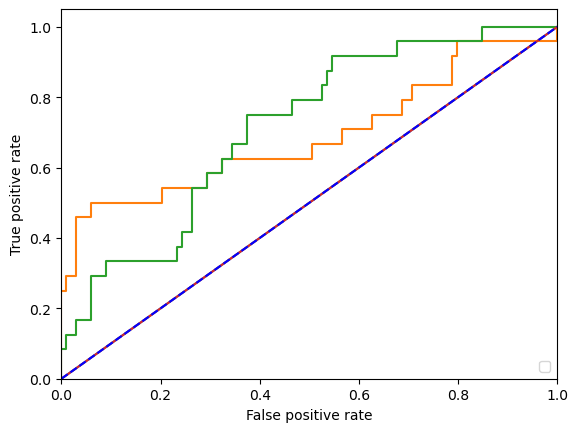

In [28]:
models = {'rf':rf, 'svc':svc,'LogR':LogR,'knn':knn}
plot_roc(X_test, y_test, models)

In [29]:
import warnings
import joblib

# define a list of models to train and their corresponding hyperparameters to tune
models = [
    {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(),
        "hyperparameters": {
            "penalty": ["l2"],
            "C": [0.01, 0.1, 1, 10],
            "max_iter": [500]
        }
    },
        {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "max_depth": [5, 10, 20, None]
        }
    },

]

In [27]:
# train and tune each model
accuracies = []
best_models = {}
for model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Training {model['name']}...")
        grid_search = GridSearchCV(
            estimator=model['estimator'],
            param_grid=model['hyperparameters'],
            scoring='accuracy',
            cv=5
        )
        grid_search.fit(X_train, y_train)
# evaluate the model's performance
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append((model['name'], accuracy))
        best_models[model['name']] = best_model

        print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
        print(f"Accuracy for {model['name']}: {accuracy}")

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 500, 'penalty': 'l2'}
Accuracy for Logistic Regression: 0.8943089430894309
Training Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Accuracy for Random Forest: 0.9349593495934959


In [28]:
 # create the Logistic Regression model with the best hyperparameters
log_reg_model = LogisticRegression(
    C=10,
    max_iter=500,
    penalty='l2'
)

# create the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(
    max_depth=10,
    n_estimators=300
)

In [29]:
# train the Logistic Regression model on the training data
log_reg_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_log_reg = log_reg_model.predict(X_test)

# train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

C:\Apna program\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


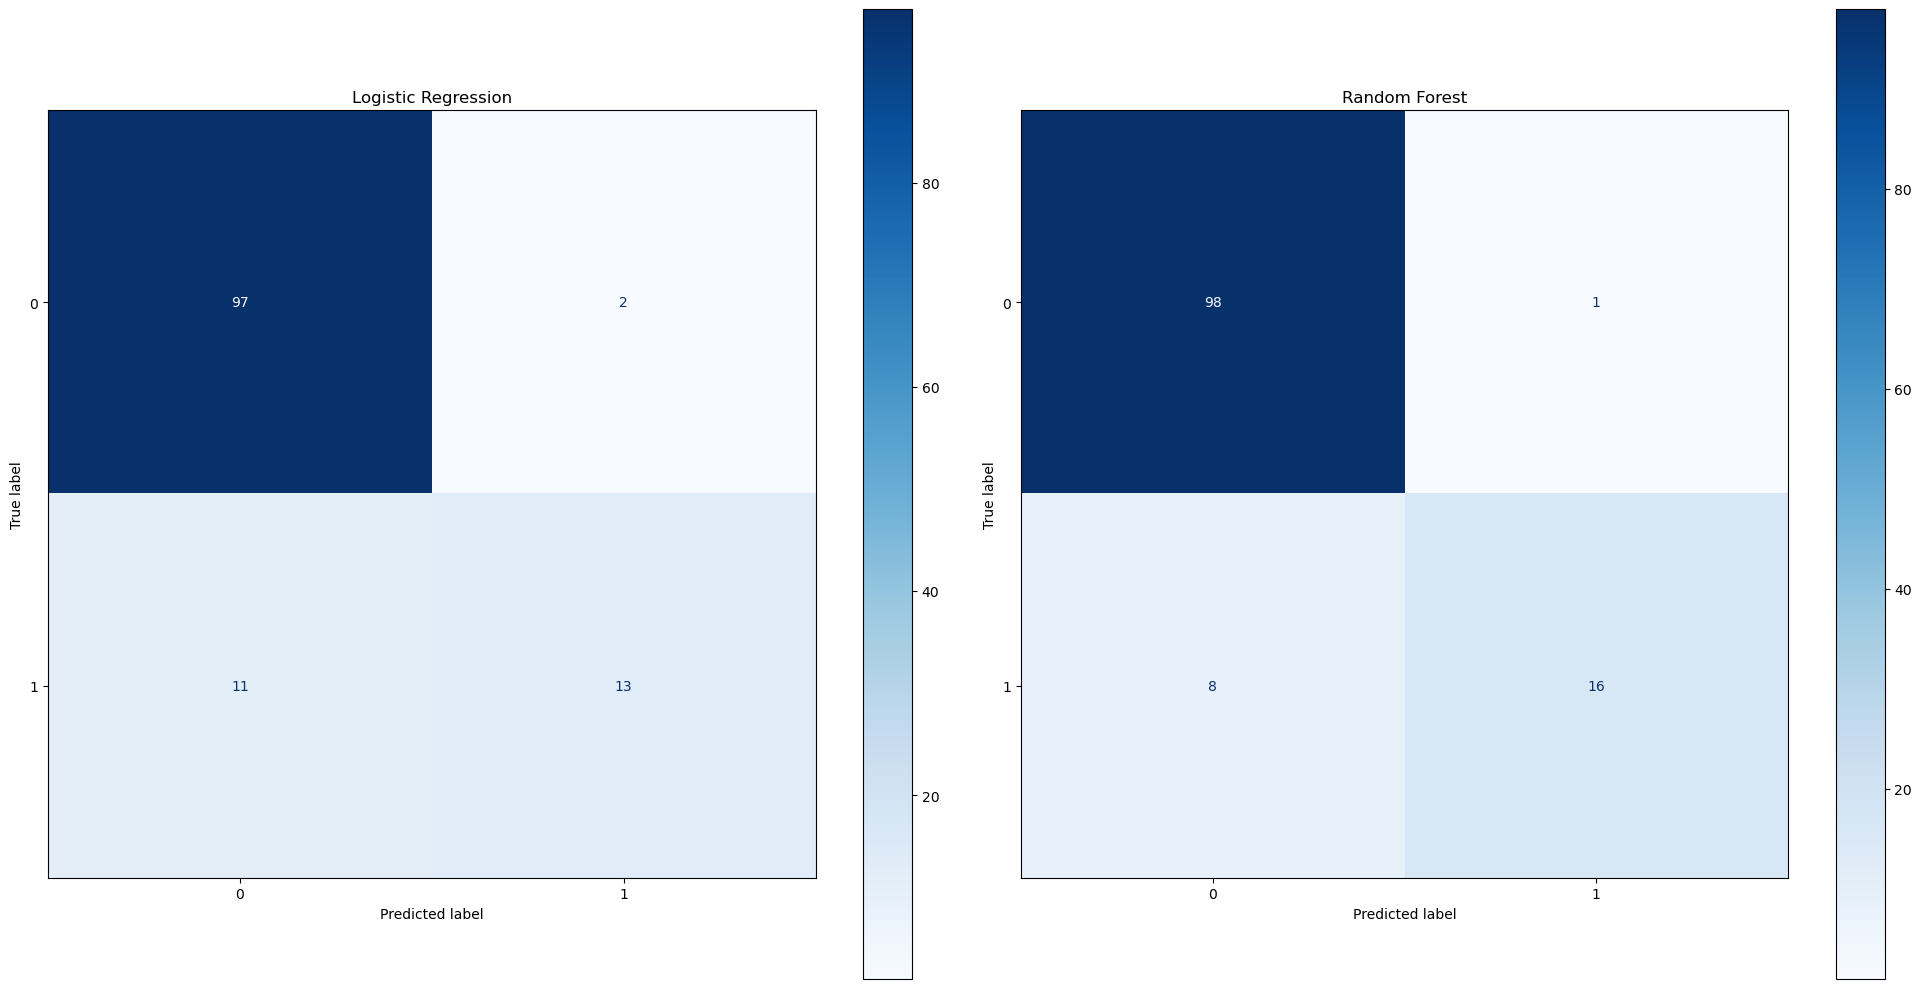

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# define the models and their names
models = {
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model,
}

# create a subplot grid with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# iterate over the models and plot the confusion matrix in the corresponding subplot
for i, (name, model) in enumerate(models.items()):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', ax=axs[i])
    disp.ax_.set_title(name)

plt.tight_layout()
plt.show()

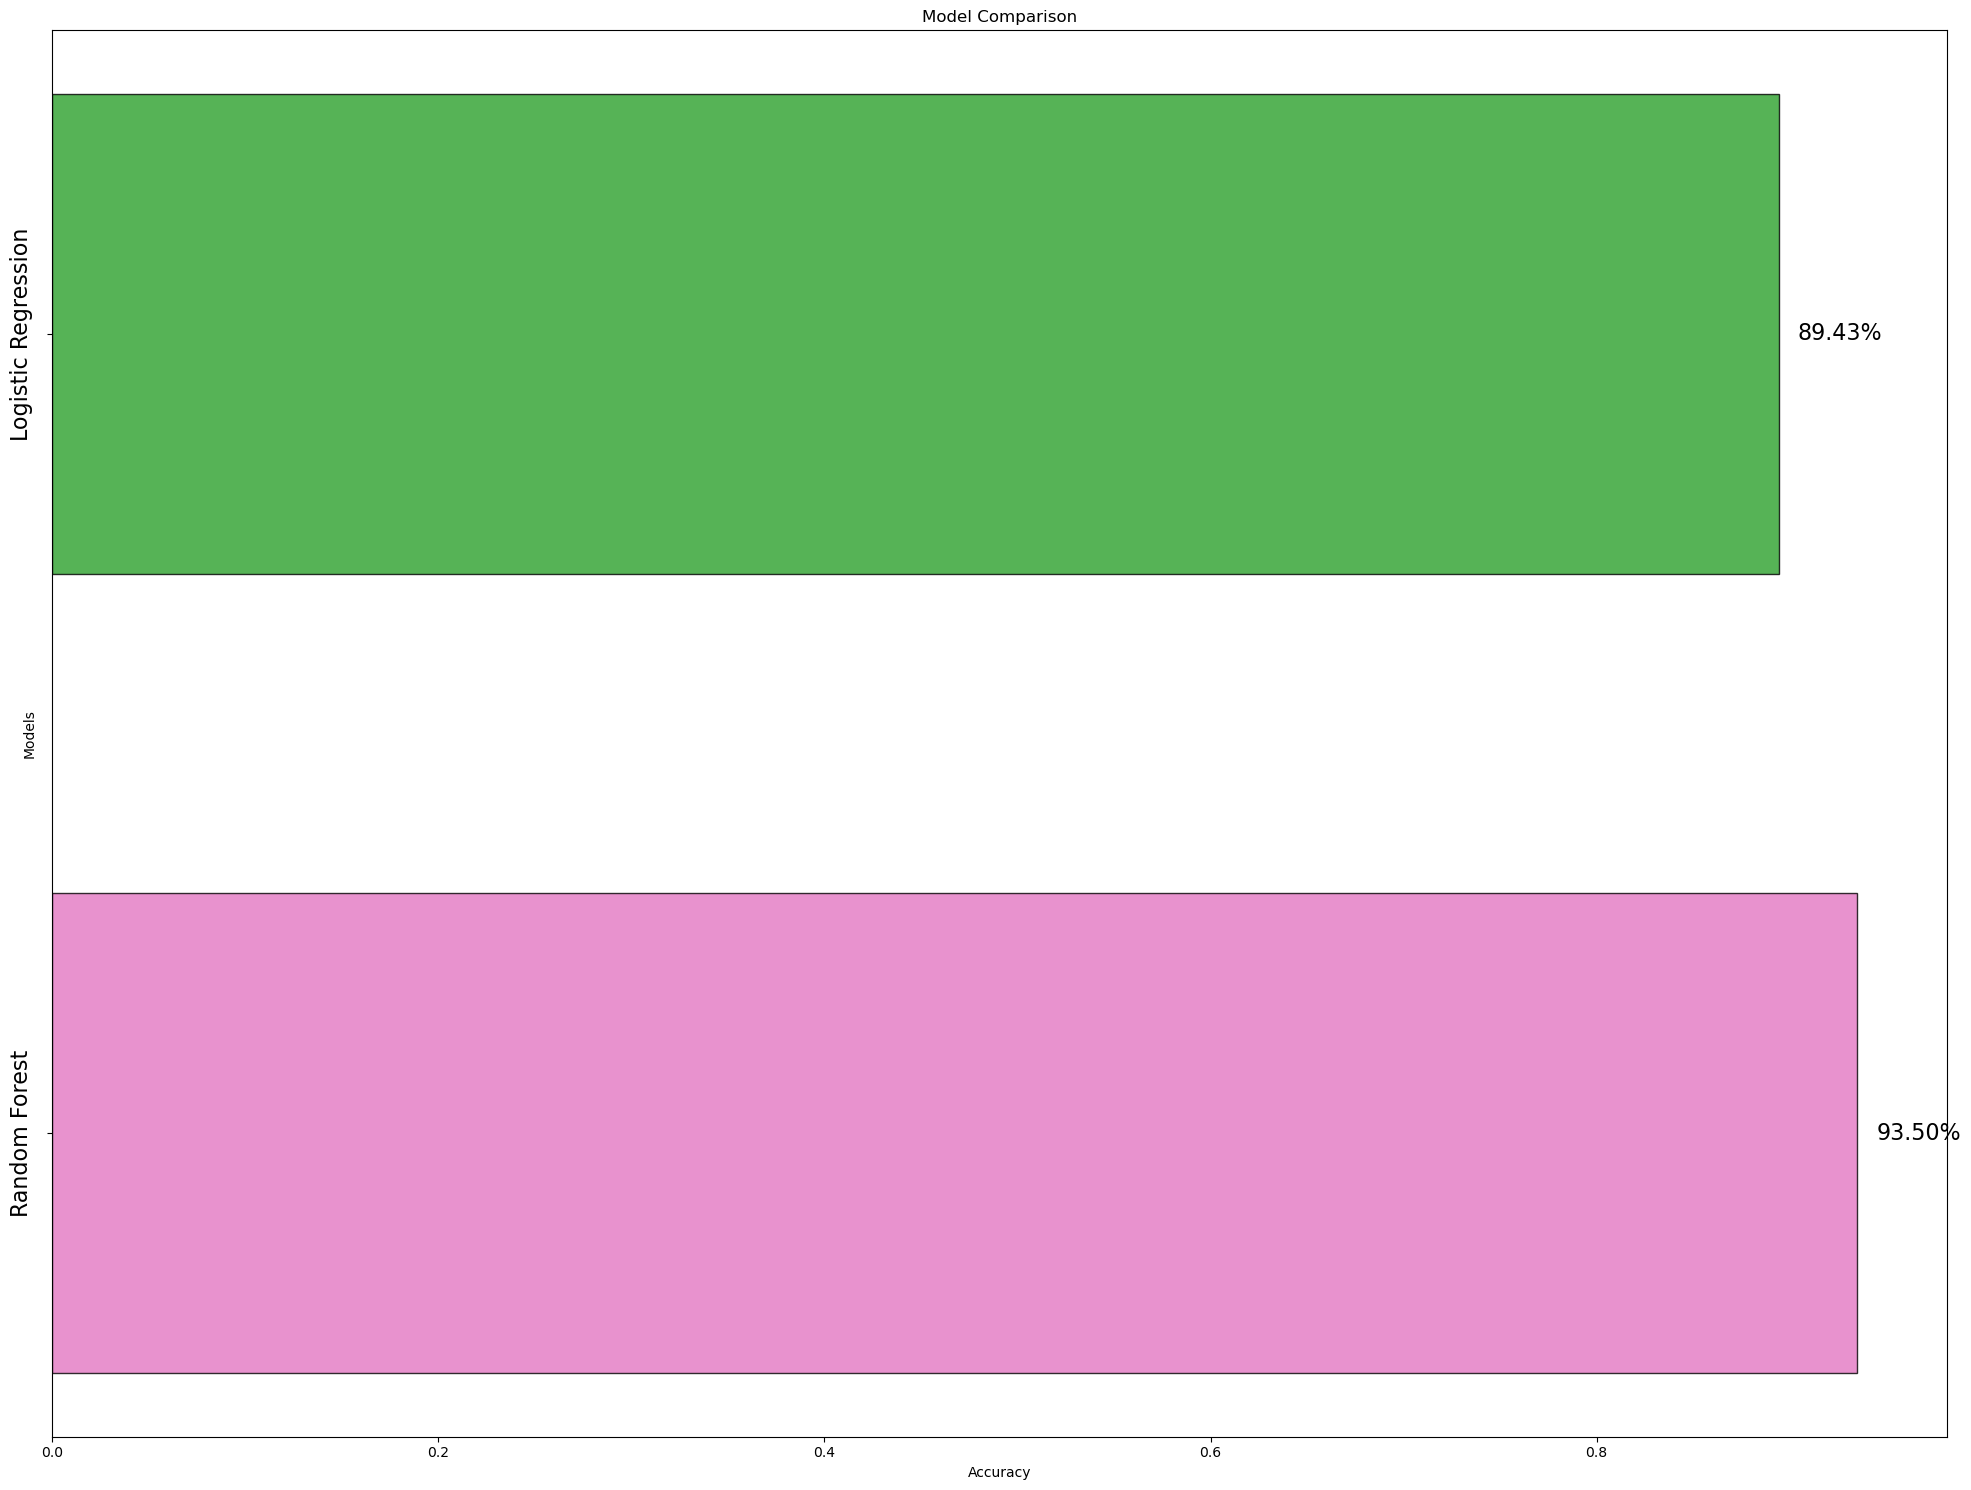

In [31]:
import matplotlib.pyplot as plt

# Sort accuracies in descending order
accuracies.sort(key=lambda x: x[1], reverse=True)

# Extract model names and accuracies
names, values = zip(*accuracies)

# Set color scheme
colors = ['tab:pink', 'tab:green']

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(range(len(names)), values, color=colors, edgecolor='black', height=0.6, alpha=0.8, capsize=5, tick_label='')

# Add labels to the bars
for i, (name, acc) in enumerate(zip(names, values)):
    ax.text(acc + 0.01, i, f"{acc:.2%}", ha='left', va='center', fontsize=16)
    ax.text(-0.01, i, name, ha='right', va='center', fontsize=16, rotation=90)
# Set axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.set_title('Model Comparison')
# Adjust layout and save plot
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()    


In [24]:
LogR = LogisticRegression()
LogR.fit(X,y)
predict = cross_val_predict(estimator = LogR, X = X, y = y)
print("Classification Report: \n",classification_report(y, predict))

C:\Apna program\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Apna program\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       540
           1       0.85      0.67      0.75        75

    accuracy                           0.94       615
   macro avg       0.90      0.82      0.86       615
weighted avg       0.94      0.94      0.94       615



C:\Apna program\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Apna program\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [25]:
svc = SVC()
svc.fit(X,y)
predict = cross_val_predict(estimator = svc, X = X, y = y)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       540
           1       0.89      0.64      0.74        75

    accuracy                           0.95       615
   macro avg       0.92      0.81      0.86       615
weighted avg       0.94      0.95      0.94       615



C:\Apna program\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Apna program\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


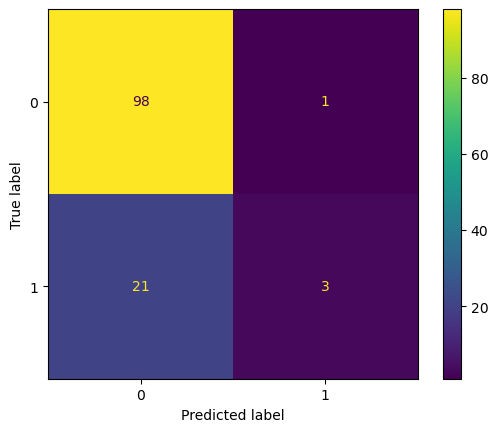

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
cm = plot_confusion_matrix(LogR, X_test, y_test, labels = LogR.classes_)

In [33]:
LogR.classes_

array([0, 1], dtype=int64)